In [1]:
# Clasificador de BF con Chalearn en BN y Keras, clases binarias por cada factor
# Miguelangel Moreno Sotelo

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import random
import time
import pickle
import keras
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Dropout
from keras.models import Model
from keras import backend as K
from keras.models import model_from_json
from keras import optimizers
from keras import losses
from keras import regularizers
from keras.layers.normalization import BatchNormalization

from PIL import Image,ImageOps

Using TensorFlow backend.


## DataSet

In [2]:
class DataSet:
    data_train = None;
    data_test  = None;
    
    # 30935 total
    total_train = 28152;
    total_test  =  2783;
       
    
    def read_pickle(self, name, show=False):
        
        if show:
            print('Cargando pickle',"../DataSet/{}.pickle".format(name));
        pic = pickle.load(open("../DataSet/{}.pickle".format(name), "rb"));
        
        X = np.array(pic['X']);   
        Y = np.array(pic['Y']);
        
        if show:
           print('X-',X.shape)
           print('Y-',Y.shape)        
                
        return X,Y;
                         
        
    def load_dataset(self):
        self.data_train = dict(X=[],Y=[]);
        self.data_test  = dict(X=[],Y=[]);
        
        for i in range(1,4):
            x,y = self.read_pickle('train_clselfie_v7_{}'.format(i), show=True);
            self.data_train['X'].extend(x);
            self.data_train['Y'].extend(y);
        
        x,y = self.read_pickle('test_clselfie_v7', show=True);
        self.data_test['X'].extend(x);
        self.data_test['Y'].extend(y);
           
        
        
        self.data_train['X'] = np.array(self.data_train['X']);        
        self.data_train['Y'] = np.array(self.data_train['Y']);
                
        self.data_test['X'] = np.array(self.data_test['X']);
        self.data_test['Y'] = np.array(self.data_test['Y']);     
       
        
        
        
        print('\nTotal Train Data X:',self.data_train['X'].shape,'Y:',self.data_train['Y'].shape);
        print('\nTotal Test  Data X:',self.data_test['X'].shape,'Y:',self.data_test['Y'].shape);    
        
    
    def normalize_images(self):
        
        print('\nNormalizando')
        train_x = [];
        test_x = [];
        
        for i in range(self.data_train['X'].shape[0]):
            train_x.append(self.data_train['X'][i] / 255);
            
        for i in range(self.data_test['X'].shape[0]):
            test_x.append(self.data_test['X'][i] / 255)
            
        self.data_train['X'] = np.array(train_x);
        self.data_test['X'] = np.array(test_x);
          
        
        print('Total Train Data X:',self.data_train['X'].shape,'Y:',self.data_train['Y'].shape);
        print('Total Test  Data X:',self.data_test['X'].shape,'Y:',self.data_test['Y'].shape);    
        
        

        

In [3]:
# Cargamos Dataset
ds = DataSet();
ds.load_dataset();

Cargando pickle ../DataSet/train_clselfie_v7_1.pickle
X- (9000, 208, 208, 1)
Y- (9000, 5)
Cargando pickle ../DataSet/train_clselfie_v7_2.pickle
X- (9000, 208, 208, 1)
Y- (9000, 5)
Cargando pickle ../DataSet/train_clselfie_v7_3.pickle
X- (10152, 208, 208, 1)
Y- (10152, 5)
Cargando pickle ../DataSet/test_clselfie_v7.pickle
X- (2783, 208, 208, 1)
Y- (2783, 5)

Total Train Data X: (28152, 208, 208, 1) Y: (28152, 5)

Total Test  Data X: (2783, 208, 208, 1) Y: (2783, 5)


In [4]:
print(ds.data_train['X'][0][0][0])

ds.normalize_images();

print('\n',ds.data_train['X'][0][0][0])

[198]

Normalizando
Total Train Data X: (28152, 208, 208, 1) Y: (28152, 5)
Total Test  Data X: (2783, 208, 208, 1) Y: (2783, 5)

 [0.77647059]


Y [1 1 1 0 1]


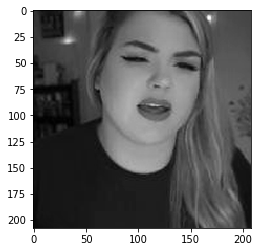

Y [1 0 0 1 0]


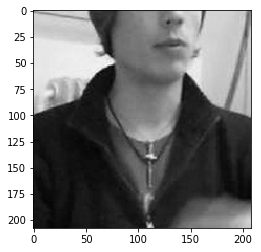

Y [0 0 0 0 1]


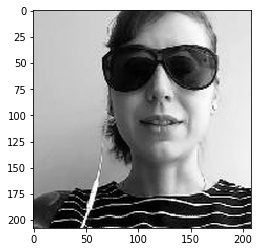

Y [1 0 1 0 1]


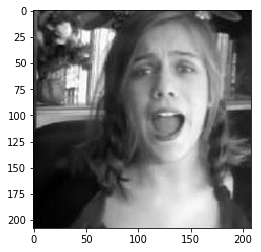

In [5]:
for i in range(0,2):
    print('Y',ds.data_test['Y'][i])
    plt.imshow(ds.data_test['X'][i].reshape(208,208), cmap='gray')
    plt.show();
    
for i in range(0,2):
    print('Y',ds.data_train['Y'][i])
    plt.imshow(ds.data_train['X'][i].reshape(208,208), cmap='gray')
    plt.show();

## Modelo y Entrenamiento

In [6]:
def save_model(index=0):
    name = 'cnn4_train';
    model_json = classifier.to_json()
    with open("{}_{}.json".format(name, index), "w") as json_file:
        json_file.write(model_json)
    classifier.save_weights("{}_{}.h5".format(name,index),)
    print("Modelo guardado en disco","{}_{}.h5".format(name,index))

In [24]:
input_cla = Input(shape=(208,208,1,))

fm_size = 16;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(input_cla)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

fm_size = fm_size*2;
x = Conv2D(fm_size, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

em_size = math.ceil(208/(2**8));


x = Reshape((em_size*em_size*fm_size,),input_shape=(em_size,em_size,fm_size))(x)
x=Dense(50,activation='relu', input_shape=(em_size*em_size*fm_size,))(x)
x=Dense(50,activation='relu')(x)
# x=Dense(50,activation='relu')(x)
# x=Dense(500,activation='relu')(x)
# x=Dense(500,activation='relu')(x)
# x=Dense(500,activation='relu')(x)
# x=Dense(100,activation='relu')(x)
# x=Dense(100,activation='relu')(x)
output=Dense(5)(x)


adam = optimizers.adam(lr=1e-6)
classifier = Model(input_cla, output)
classifier.compile(optimizer=adam, loss=losses.mse)
# classifier.compile(optimizer=adam, loss=my_loss)

classifier.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 208, 208, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 208, 208, 16)      160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 104, 104, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 104, 104, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 26, 26, 64)        0         
__________

In [41]:
save = 2;

In [25]:
global_history = {'val_loss':[], 'loss':[], 'mean_acc':[]}
best_acc = 0;

In [42]:

for i in range(0,100):
    h = classifier.fit(ds.data_train['X'], ds.data_train['Y'],
            epochs=1,
            batch_size=100,
            shuffle=False,
            validation_data=(ds.data_test['X'], ds.data_test['Y']))
    
    global_history['val_loss'].extend(h.history['val_loss'])
    global_history['loss'].extend(h.history['loss'])
    
    mean_acc = get_global_acc();
    global_history['mean_acc'].append(mean_acc);
    
    print('Mean-acc:',mean_acc)
    
    if mean_acc > best_acc:
        best_acc = mean_acc;
        save_model(index=save);


Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 985us/step - loss: 0.2050 - val_loss: 0.2201
Mean-acc: 64.38375853395615
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 986us/step - loss: 0.2048 - val_loss: 0.2201
Mean-acc: 64.36219906575639
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 989us/step - loss: 0.2045 - val_loss: 0.2202
Mean-acc: 64.39813151275601
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 989us/step - loss: 0.2043 - val_loss: 0.2202
Mean-acc: 64.33345310815666
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 988us/step - loss: 0.2040 - val_loss: 0.2202
Mean-acc: 64.37657204455624
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [=============

28152/28152 [==============================] - 28s 995us/step - loss: 0.1924 - val_loss: 0.2219
Mean-acc: 64.51311534315487
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 997us/step - loss: 0.1921 - val_loss: 0.2220
Mean-acc: 64.49155587495508
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 1ms/step - loss: 0.1918 - val_loss: 0.2221
Mean-acc: 64.52748832195472
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 998us/step - loss: 0.1914 - val_loss: 0.2222
Mean-acc: 64.49874236435502
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 1ms/step - loss: 0.1911 - val_loss: 0.2223
Mean-acc: 64.56342076895437
Modelo guardado en disco cnn4_train_2.h5
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 2

28152/28152 [==============================] - 28s 995us/step - loss: 0.1791 - val_loss: 0.2259
Mean-acc: 64.73589651455265
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 996us/step - loss: 0.1788 - val_loss: 0.2259
Mean-acc: 64.68559108875316
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 1ms/step - loss: 0.1784 - val_loss: 0.2260
Mean-acc: 64.64247215235358
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 997us/step - loss: 0.1781 - val_loss: 0.2262
Mean-acc: 64.63528566295363
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 997us/step - loss: 0.1778 - val_loss: 0.2263
Mean-acc: 64.64247215235358
Train on 28152 samples, validate on 2783 samples
Epoch 1/1
28152/28152 [==============================] - 28s 997us/step - loss: 0.1774 - val_loss

In [122]:
print(global_history['mean_acc'])

[59.05775062881782, 61.12745957599713, 61.09152712899749, 60.854372978799866, 60.95498383039887, 60.911864893999294, 60.954983830398845, 60.940610851599, 61.1202730865972, 61.19213798059649, 61.278375853395616, 61.28556234279556, 61.350240747394906, 61.5514624505929, 61.82454904779016, 61.91797340998923, 61.96109234638879, 62.162314049586776, 62.25573841178585, 62.42102766798419, 62.622249371182185, 62.76597915918074, 62.8809629895796, 63.010319798778305, 63.168422565576705, 63.21154150197629, 63.32652533237514, 63.384017247574555, 63.398390226374424, 63.427136183974135, 63.44150916277398, 63.5205605461732, 63.57805246137262, 63.61398490837226, 63.72178224937118, 63.786460653970536, 63.89425799496946, 63.951749910168886, 63.98768235716852, 64.05236076176787, 64.16734459216673, 64.1098526769673, 64.10266618756738, 64.08829320876752, 64.08829320876752, 64.12422565576716, 64.18890406036651, 64.24639597556593, 64.28232842256557, 64.31107438016528, 64.35419331656485, 64.3685662953647, 64.36

In [44]:
print(global_history['loss'])

[0.33558937590691, 0.24466239827605396, 0.23323466478253874, 0.23121271190969536, 0.22979133846315006, 0.2290476931851335, 0.22846204769919629, 0.22793269879389771, 0.22744464583570018, 0.22699585972175437, 0.22658102064647265, 0.2261991676755099, 0.2258456469102995, 0.22551701892231907, 0.22520509618407253, 0.22490990931725563, 0.2246319743915524, 0.22436743805306172, 0.22411401770557995, 0.22386679773592888, 0.22362756357126257, 0.22339299415603692, 0.22315806774599845, 0.22292704776280914, 0.22269374241194423, 0.22245847773834804, 0.22222554309780065, 0.2219951058203065, 0.22176416662690246, 0.2215302492084067, 0.22129629231813652, 0.22106208728055243, 0.22082818304189872, 0.22059325909844918, 0.22035788928888236, 0.2201189533295229, 0.2198819768622742, 0.2196462109206447, 0.21940732213770947, 0.21917092997467494, 0.21892649836205189, 0.21868519850856508, 0.21844556830076034, 0.21820829219906532, 0.21797361968042295, 0.21773602770713962, 0.2175020794044099, 0.2172693070167166, 0.217

In [45]:
print(global_history['val_loss'])

[0.2664913301561275, 0.23411588579084305, 0.2320104796349724, 0.23107081556915596, 0.2305523287765936, 0.22989670690276234, 0.22937387392390687, 0.22879539350361605, 0.2282545181902201, 0.2277471993923016, 0.22726230015974871, 0.2268211485625941, 0.22642375402449705, 0.22604395238735503, 0.22569040361386258, 0.22536815844805516, 0.22507168004035608, 0.22479461812411886, 0.22453846776288403, 0.22431919310660917, 0.22407768204663667, 0.2238511163426782, 0.22363432494912094, 0.22343158535056948, 0.22322086756429868, 0.2229848685686082, 0.22279876838945203, 0.22258848846065796, 0.22240574942233104, 0.22221744959512033, 0.22203261918979628, 0.22185747818020748, 0.22168542330122834, 0.22152382390793818, 0.22134684212572747, 0.22119594757564626, 0.22103785813668628, 0.22089785924820518, 0.22080120632770975, 0.22064670343708315, 0.22051654720730463, 0.22039960417929974, 0.22029834327147754, 0.220194411484449, 0.22009892137925316, 0.22001758019700565, 0.21992347186797392, 0.21985390676340097, 0

In [56]:
classifier.load_weights("cnn4_train_2.h5")
print("Modelo cargado desde disco ")


classifier.summary();

Modelo cargado desde disco 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 208, 208, 1)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 208, 208, 16)      160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 104, 104, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 104, 104, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 26, 26, 64) 

In [31]:
%matplotlib inline

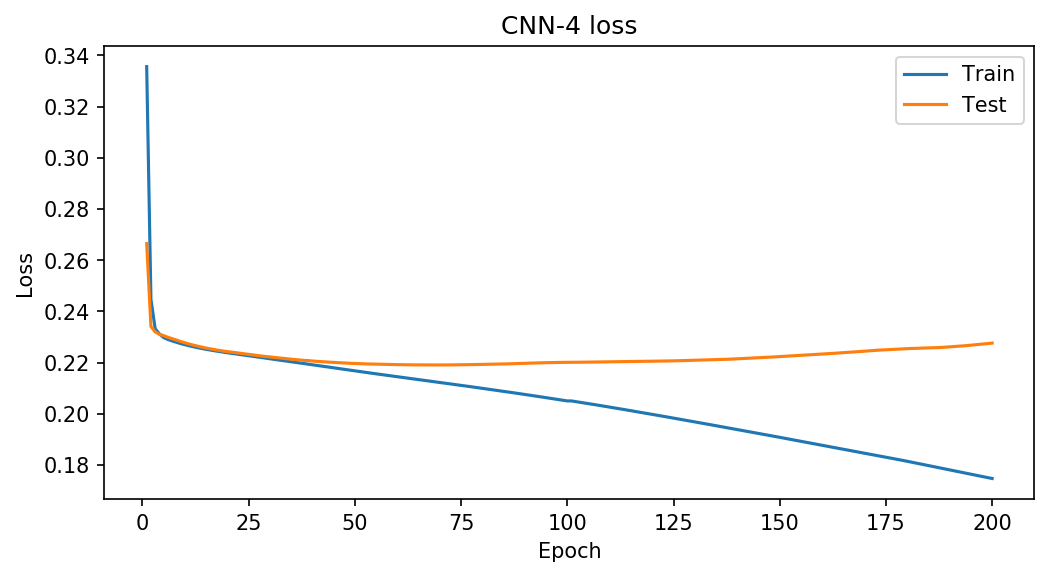

In [123]:
# Plot training & validation loss values
fig =plt.figure(figsize=(8,4),dpi=150)
fig,axes=plt.subplots(figsize=(8,4),dpi=150)
x = np.arange(1,201,1);

axes.plot(x, global_history['loss'][0:200])
axes.plot(x, global_history['val_loss'][0:200])

plt.title('CNN-4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')


fig.savefig("cnn4-full.png",dpi=150) 

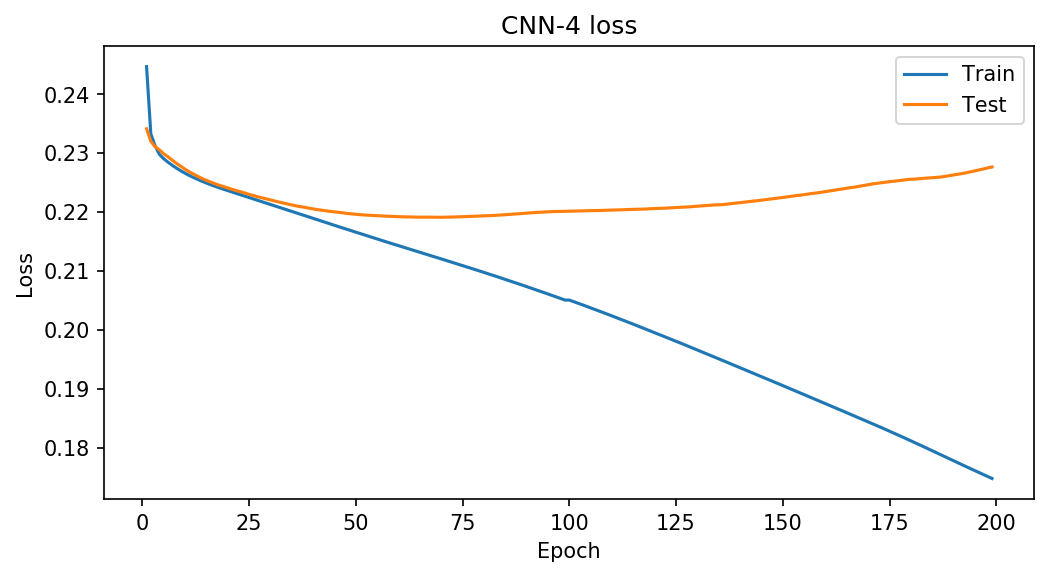

In [124]:
# Plot training & validation loss values
fig =plt.figure(figsize=(8,4),dpi=150)
fig,axes=plt.subplots(figsize=(8,4),dpi=150)
x = np.arange(1,200,1);

axes.plot(x, global_history['loss'][1:200])
axes.plot(x, global_history['val_loss'][1:200])

plt.title('CNN-4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')


fig.savefig("cnn4-zoom.png",dpi=150) 

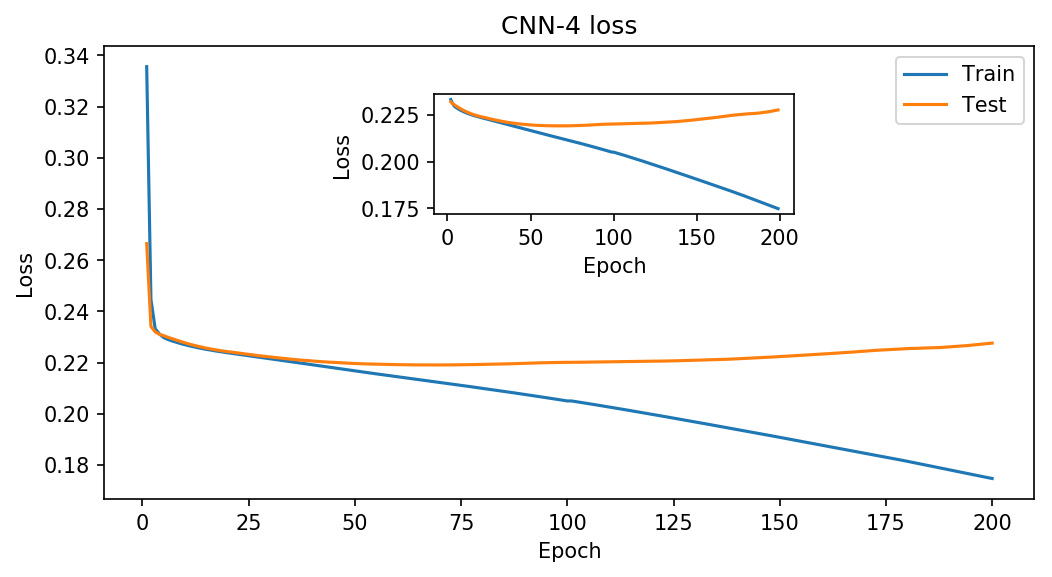

In [125]:
fig =plt.figure(figsize=(8,4),dpi=150)
fig,axes=plt.subplots(figsize=(8,4),dpi=150)

x = np.arange(1,201,1);
axes.plot(x, global_history['loss'][0:200])
axes.plot(x, global_history['val_loss'][0:200])
plt.title('CNN-4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

zoom_init = 2;
x = np.arange(zoom_init,200,1);
axes2=fig.add_axes([0.4,0.6,0.3,0.2])
axes2.plot(x, global_history['loss'][zoom_init:200])
axes2.plot(x, global_history['val_loss'][zoom_init:200])
axes2.set_xlabel("Epoch")
axes2.set_ylabel("Loss")

fig.savefig("cnn4-mix.png",dpi=150) 

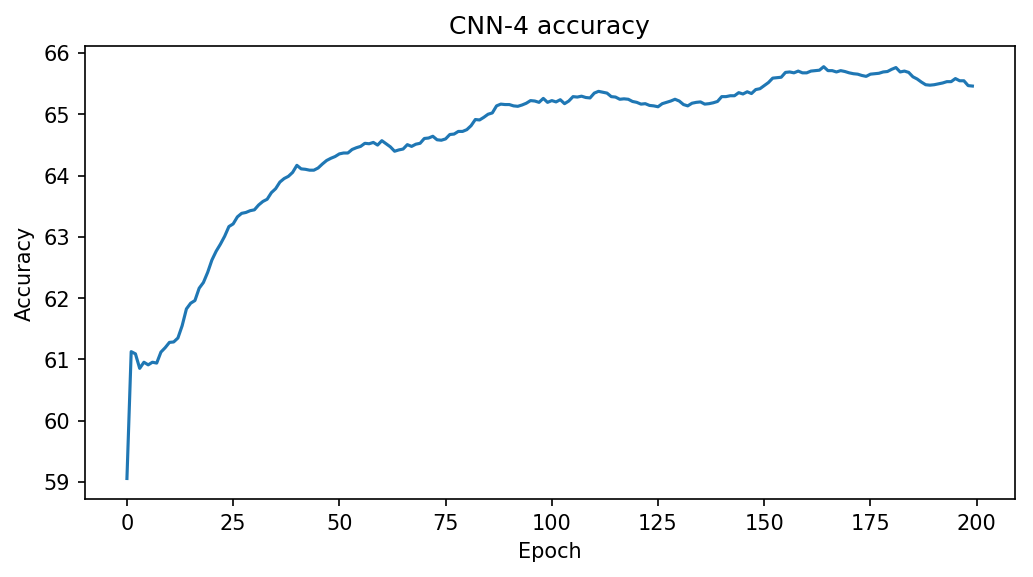

In [126]:
# Plot ACC
fig =plt.figure(figsize=(8,4),dpi=150)
fig,axes=plt.subplots(figsize=(8,4),dpi=150)

x = np.arange(1,201,1);
axes.plot(global_history['mean_acc'][0:200])
plt.title('CNN-4 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

fig.savefig("cnn4-acc.png",dpi=150) 

In [57]:
# Test como clasificacion binaria
def test_factor_class(index=0):
    X = ds.data_test['X'];
    Y = ds.data_test['Y'];
    out = classifier.predict(X)
    
    limit = 0.5714; # 4/7
#     limit = 0.5;
    
    acc = 0;

    for i in range(out.shape[0]): 
        if Y[i][index]>limit and out[i][index]>limit:
            acc = acc + 1;
        elif Y[i][index]<=limit and out[i][index]<=limit:
            acc = acc + 1;

    acc = acc / out.shape[0];
    acc *= 100;
    
    return acc;

def get_global_acc(show=False):

    acc_global = 0;

    acc = test_factor_class(index=0);
    acc_global += acc;
    if show:
        print('O',acc);   

    acc = test_factor_class(index=1);
    acc_global += acc;
    if show:
        print('C',acc);    

    acc = test_factor_class(index=2);
    acc_global += acc;
    if show:
        print('E',acc);  

    acc = test_factor_class(index=3);
    acc_global += acc;
    if show:
        print('A',acc);    

    acc = test_factor_class(index=4);
    acc_global += acc;
    if show:
        print('N',acc);  

    acc_global = acc_global / 5;
    if show:
        print('\nPromedio',acc_global)
        
    return acc_global;

prom = get_global_acc(show=True);

O 62.48652533237513
C 67.94825727632052
E 70.21200143729787
A 59.432267337405676
N 64.60653970535394

Promedio 64.93711821775062


In [10]:
# Matriz de confusion
Y = ds.data_test['Y'][:];
out = classifier.predict(ds.data_test['X'][:])

limit = 0.5714; # 4/7

# Construccion de la matriz
matrix = np.zeros((2,2))

for i in range(out.shape[0]):
#     print(tar[i])
#     print(out[i],'\n')
    
    for j in range(out.shape[1]):
        
        if Y[i][j]==0 and out[i][j]<=limit: 
            matrix[0][0] += 1;     
        elif Y[i][j]==0 and out[i][j]>limit:
            matrix[1][0] += 1; 
        elif Y[i][j]==1 and out[i][j]<=limit:
            matrix[0][1] += 1;     
        elif Y[i][j]==1 and out[i][j]>limit:
            matrix[1][1] += 1; 
            
        
# Imprimimos con formato
just = 8;
header = '----'
header += repr(0).rjust(just)
header += repr(1).rjust(just)
print(header)


for i in range(matrix.shape[0]):
    row = str(i)+'    ';
    
    for j in range(matrix.shape[1]):        
        row += repr(int(matrix[i][j])).rjust(just)
        
    row += repr(int(sum(matrix[i]))).rjust(just)
    
    print(row)

row = '-----';
for i in range(matrix.shape[1]):
    row += repr(int(sum(matrix[:,i]))).rjust(just)
print(row)

success = 0;
for i in range(0,2):
    success += matrix[i][i]
    
print('\n\nCorrectos',int(success))
print('Total',int(sum(sum(matrix))))
print('Acc',success/sum(sum(matrix)))

----       0       1
0        6814    3418   10232
1        1345    2338    3683
-----    8159    5756


Correctos 9152
Total 13915
Acc 0.6577075098814229
